Import Model Building Libraries

### Image Preprocessing


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle


In [ ]:
!cp kaggle.json ~/.kaggle


In [ ]:
! kaggle datasets download -d odins0n/ucf-crime-dataset

100% 11.0G/11.0G [01:47<00:00, 172MB/s]
100% 11.0G/11.0G [01:47<00:00, 110MB/s]


In [ ]:
!unzip /content/ucf-crime-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Train/Vandalism/Vandalism035_x264_230.png  
  inflating: Train/Vandalism/Vandalism035_x264_240.png  
  inflating: Train/Vandalism/Vandalism035_x264_250.png  
  inflating: Train/Vandalism/Vandalism035_x264_260.png  
  inflating: Train/Vandalism/Vandalism035_x264_270.png  
  inflating: Train/Vandalism/Vandalism035_x264_280.png  
  inflating: Train/Vandalism/Vandalism035_x264_290.png  
  inflating: Train/Vandalism/Vandalism035_x264_30.png  
  inflating: Train/Vandalism/Vandalism035_x264_300.png  
  inflating: Train/Vandalism/Vandalism035_x264_310.png  
  inflating: Train/Vandalism/Vandalism035_x264_320.png  
  inflating: Train/Vandalism/Vandalism035_x264_330.png  
  inflating: Train/Vandalism/Vandalism035_x264_340.png  
  inflating: Train/Vandalism/Vandalism035_x264_350.png  
  inflating: Train/Vandalism/Vandalism035_x264_360.png  
  inflating: Train/Vandalism/Vandalism035_x264_370.png  
  inflating: Train/Vandalism/Vandalism

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale =1./255, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale =1./255)

x_train = train_datagen.flow_from_directory('/content/Train', target_size = (224,224), class_mode='categorical', batch_size=32)
x_train

Found 1266345 images belonging to 14 classes.


In [ ]:
x_test = train_datagen.flow_from_directory('/content/Test', target_size = (224,224), class_mode='categorical', batch_size=32)
x_test

Found 111308 images belonging to 14 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential()
model.add(Convolution2D(32,(3,3), activation = 'relu', input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(32,(3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(32,(3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(32,(3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(32,(3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(150, activation = 'relu'))
model.add(Dense(14, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_train,steps_per_epoch=39,epochs=5,validation_data=x_test,validation_steps=10)

Epoch 1/5
39/39 [==============================] - 156s 4s/step - loss: 1.3126 - accuracy: 0.7316 - val_loss: 1.8889 - val_accuracy: 0.6406
Epoch 2/5
39/39 [==============================] - 160s 4s/step - loss: 1.2241 - accuracy: 0.7380 - val_loss: 1.7906 - val_accuracy: 0.6094
Epoch 3/5
39/39 [==============================] - 159s 4s/step - loss: 1.1217 - accuracy: 0.7596 - val_loss: 1.7469 - val_accuracy: 0.5969
Epoch 4/5
39/39 [==============================] - 158s 4s/step - loss: 1.1063 - accuracy: 0.7540 - val_loss: 2.2213 - val_accuracy: 0.5625
Epoch 5/5
39/39 [==============================] - 167s 4s/step - loss: 1.0210 - accuracy: 0.7756 - val_loss: 1.7638 - val_accuracy: 0.6187


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [27]:
#Saving our model

model.save('Crime.h5')

In [25]:
#Testing the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [26]:
import tensorflow as tf

In [38]:
model=tf.keras.models.load_model(r"/content/Crime.h5",compile=False)

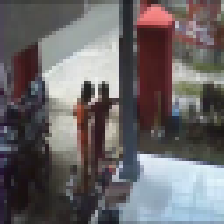

In [49]:
img=image.load_img('/content/Train/RoadAccidents/RoadAccidents003_x264_1140.png',target_size=(224,224))
img

In [50]:
x=image.img_to_array(img)
x

array([[[ 64.,  59.,  70.],
        [ 64.,  59.,  70.],
        [ 64.,  59.,  70.],
        ...,
        [139., 145., 138.],
        [139., 145., 138.],
        [139., 145., 138.]],

       [[ 64.,  59.,  70.],
        [ 64.,  59.,  70.],
        [ 64.,  59.,  70.],
        ...,
        [139., 145., 138.],
        [139., 145., 138.],
        [139., 145., 138.]],

       [[ 64.,  59.,  70.],
        [ 64.,  59.,  70.],
        [ 64.,  59.,  70.],
        ...,
        [139., 145., 138.],
        [139., 145., 138.],
        [139., 145., 138.]],

       ...,

       [[ 48.,  38.,  58.],
        [ 48.,  38.,  58.],
        [ 48.,  38.,  58.],
        ...,
        [139., 162., 181.],
        [139., 162., 181.],
        [139., 162., 181.]],

       [[ 48.,  38.,  58.],
        [ 48.,  38.,  58.],
        [ 48.,  38.,  58.],
        ...,
        [139., 162., 181.],
        [139., 162., 181.],
        [139., 162., 181.]],

       [[ 48.,  38.,  58.],
        [ 48.,  38.,  58.],
        [ 48.,  

In [51]:
x=np.expand_dims(x,axis=0)
x.ndim

4

In [52]:
x.shape

(1, 224, 224, 3)

In [54]:
pred=model.predict(x)
pred

1/1 [==============================] - 0s 191ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [53]:
pred = np.argmax(model.predict(x))

1/1 [==============================] - 0s 215ms/step


In [74]:
op=['Abuse','Arrest','Arson','Assault','Burglary','Explosion','Fighting','NormalVideos','RoadAccidents','Robbery','Shooting','Shoplifting','Stealing','Vandalism']
op[9]



'Robbery'